In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn

path = 'population_en_v2.csv'
df = pd.read_csv(path)

df.head(10)

,Provinces/city,Population density,Average population,Sex ratio,Population grow ratio,15+ labor,Region,Year
0,Ha Noi,2031.1,6761.3,97.8,1.93,3572.9,Hong river Delta,2011
1,Vinh Phuc,818.0,1011.4,97.6,0.38,608.3,Hong river Delta,2011
2,Bac Ninh,1292.6,1063.4,96.7,1.84,593.5,Hong river Delta,2011
3,Quang Ninh,191.4,1168.0,105.4,0.93,675.0,Hong river Delta,2011
4,Hai Duong,1044.6,1729.8,96.1,0.78,1071.0,Hong river Delta,2011
5,Hai Phong,1234.0,1879.8,98.5,1.19,1075.3,Hong river Delta,2011
6,Hung Yen,1229.4,1138.4,97.1,0.54,707.1,Hong river Delta,2011
7,Thai Binh,1137.5,1785.9,94.6,0.07,1134.2,Hong river Delta,2011
8,Ha Nam,914.5,786.9,95.5,0.07,464.0,Hong river Delta,2011
9,Nam Dinh,1110.3,1833.5,95.8,0.19,1082.2,Hong river Delta,2011


In [55]:
print(df.duplicated())

0      False
1      False
2      False
3      False
4      False
       ...  
625    False
626    False
627    False
628    False
629    False
Length: 630, dtype: bool


In [56]:
df.head()

,Provinces/city,Population density,Average population,Sex ratio,Population grow ratio,15+ labor,Region,Year
0,Ha Noi,2031.1,6761.3,97.8,1.93,3572.9,Hong river Delta,2011
1,Vinh Phuc,818.0,1011.4,97.6,0.38,608.3,Hong river Delta,2011
2,Bac Ninh,1292.6,1063.4,96.7,1.84,593.5,Hong river Delta,2011
3,Quang Ninh,191.4,1168.0,105.4,0.93,675.0,Hong river Delta,2011
4,Hai Duong,1044.6,1729.8,96.1,0.78,1071.0,Hong river Delta,2011


In [73]:
df['Population children'] = df['Average population'] - df['15+ labor']  # Trẻ em (0-14 tuổi)
# Tạo các cột phân chia giới tính
df['Population male'] = df['Average population'] * (df['Sex ratio'] / (100 + df['Sex ratio']))
df['Population female'] = df['Average population'] - df['Population_male']
# Tạo các cột phân chưa theo nông thôn và thành thị (giả định lấy theo thông tin tính đến cuối năm 2020)
df['Population urban'] = df['Average population'] * 0.383    # Thành thị
df['Population rural'] = df['Average population'] * 0.617    # Nông thôn

df.head()

,Provinces/city,Population density,Average population,Sex ratio,Population grow ratio,15+ labor,Region,Year,Population_children,Population_male,Population_female,Population_urban,Population_rural,Population children,Population male,Population female,Population urban,Population rural
0,Ha Noi,2031.1,6761.3,97.8,1.93,3572.9,Hong river Delta,2011,3188.4,3343.049242,3418.250758,2589.5779,4171.7221,3188.4,3343.049242,3418.250758,2589.5779,4171.7221
1,Vinh Phuc,818.0,1011.4,97.6,0.38,608.3,Hong river Delta,2011,403.1,499.557895,511.842105,387.3662,624.0338,403.1,499.557895,511.842105,387.3662,624.0338
2,Bac Ninh,1292.6,1063.4,96.7,1.84,593.5,Hong river Delta,2011,469.9,522.779766,540.620234,407.2822,656.1178,469.9,522.779766,540.620234,407.2822,656.1178
3,Quang Ninh,191.4,1168.0,105.4,0.93,675.0,Hong river Delta,2011,493.0,599.353457,568.646543,447.3440,720.6560,493.0,599.353457,568.646543,447.3440,720.6560
4,Hai Duong,1044.6,1729.8,96.1,0.78,1071.0,Hong river Delta,2011,658.8,847.699031,882.100969,662.5134,1067.2866,658.8,847.699031,882.100969,662.5134,1067.2866


In [74]:
summary_by_year = df.groupby('Year').sum() # Tóm tắt dữ liệu theo năm
print(summary_by_year.columns)

Index(['Provinces/city', 'Population density', 'Average population',
       'Sex ratio', 'Population grow ratio', '15+ labor', 'Region',
       'Population_children', 'Population_male', 'Population_female',
       'Population_urban', 'Population_rural', 'Population children',
       'Population male', 'Population female', 'Population urban',
       'Population rural'],
      dtype='object')


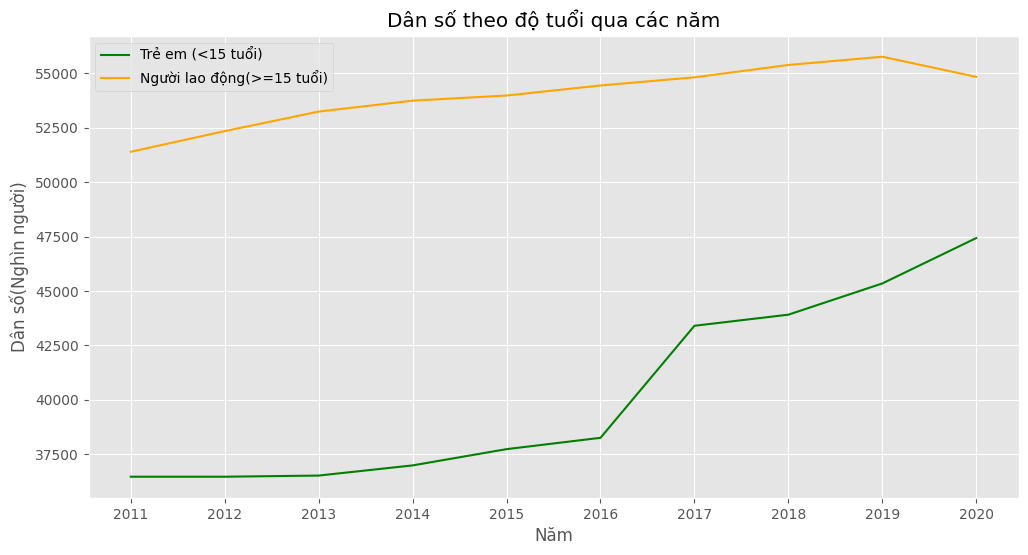

In [ ]:
# Đồ thị phân bố dân số theo độ tuổi

plt.figure(figsize=(12, 6))
plt.title('Dân số theo độ tuổi qua các năm')
plt.plot(summary_by_year.index, summary_by_year['Population children'], color = 'green', label='Trẻ em (<15 tuổi)')
plt.plot(summary_by_year.index, summary_by_year['15+ labor'], color = 'orange', label='Người lao động(>=15 tuổi)')
plt.xticks(summary_by_year.index)
plt.ylabel('Dân số(Nghìn người)')
plt.xlabel('Năm')
#plt.grid()
plt.legend();

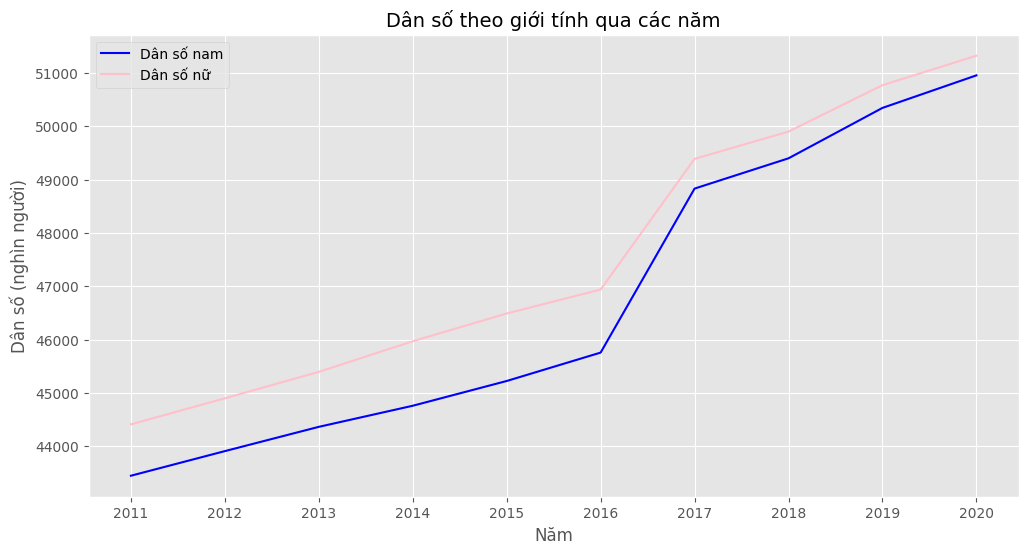

In [75]:
# Vẽ biểu đồ: Dân số theo giới tính
plt.figure(figsize=(12, 6))
plt.plot(summary_by_year.index, summary_by_year['Population male'], label='Dân số nam', color='blue')
plt.plot(summary_by_year.index, summary_by_year['Population female'], label='Dân số nữ', color='pink')
plt.title('Dân số theo giới tính qua các năm', fontsize=14)
plt.xticks(summary_by_year.index)
plt.xlabel('Năm')
plt.ylabel('Dân số (nghìn người)')
plt.legend();

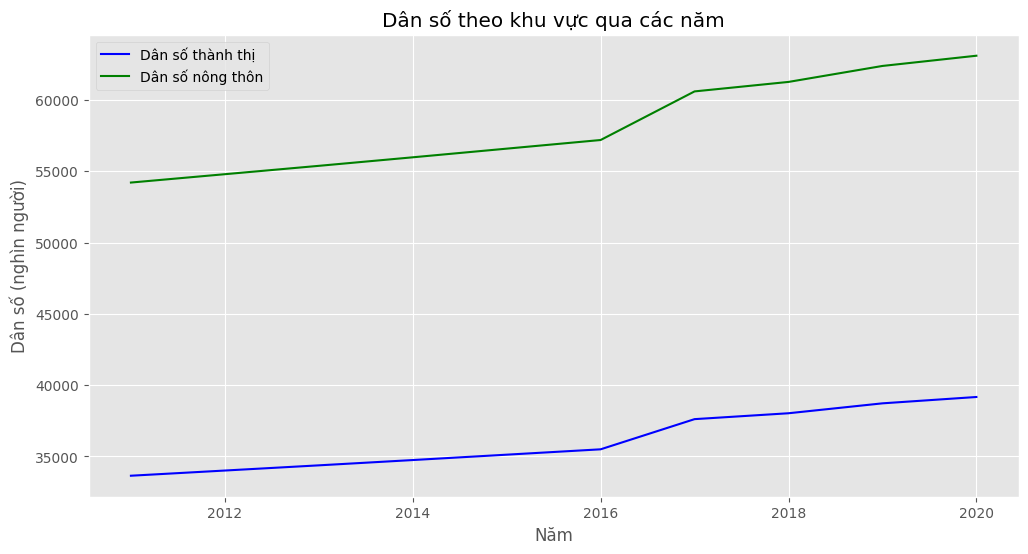

In [77]:
# Vẽ biểu đồ: Dân số theo khu vực (thành thị và nông thôn)
plt.figure(figsize=(12, 6))
plt.plot(summary_by_year.index, summary_by_year['Population urban'], label='Dân số thành thị', color='blue')
plt.plot(summary_by_year.index, summary_by_year['Population rural'], label='Dân số nông thôn', color='green')
plt.title('Dân số theo khu vực qua các năm')
plt.xlabel('Năm')
plt.ylabel('Dân số (nghìn người)')
plt.legend();